In [1]:
!wget "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

--2020-08-20 11:12:02--  http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30286 (30K) [application/x-httpd-php]
Saving to: ‘auto-mpg.data.2’

auto-mpg.data.2     100%[===================>]  29.58K   197KB/s    in 0.2s    

2020-08-20 11:12:03 (197 KB/s) - ‘auto-mpg.data.2’ saved [30286/30286]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
cols = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('./auto-mpg.data', names=cols, na_values = "?",
                comment = '\t',
                sep= " ",
                skipinitialspace=True)

data = df.copy()

In [4]:
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [6]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

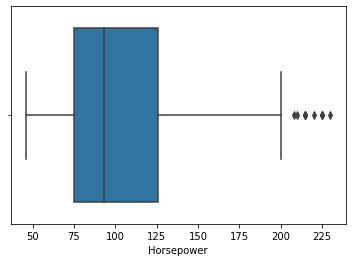

In [7]:
data.describe()

sns.boxplot(x=data['Horsepower'])

In [8]:
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [9]:
data["Cylinders"].value_counts() / len(data)
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

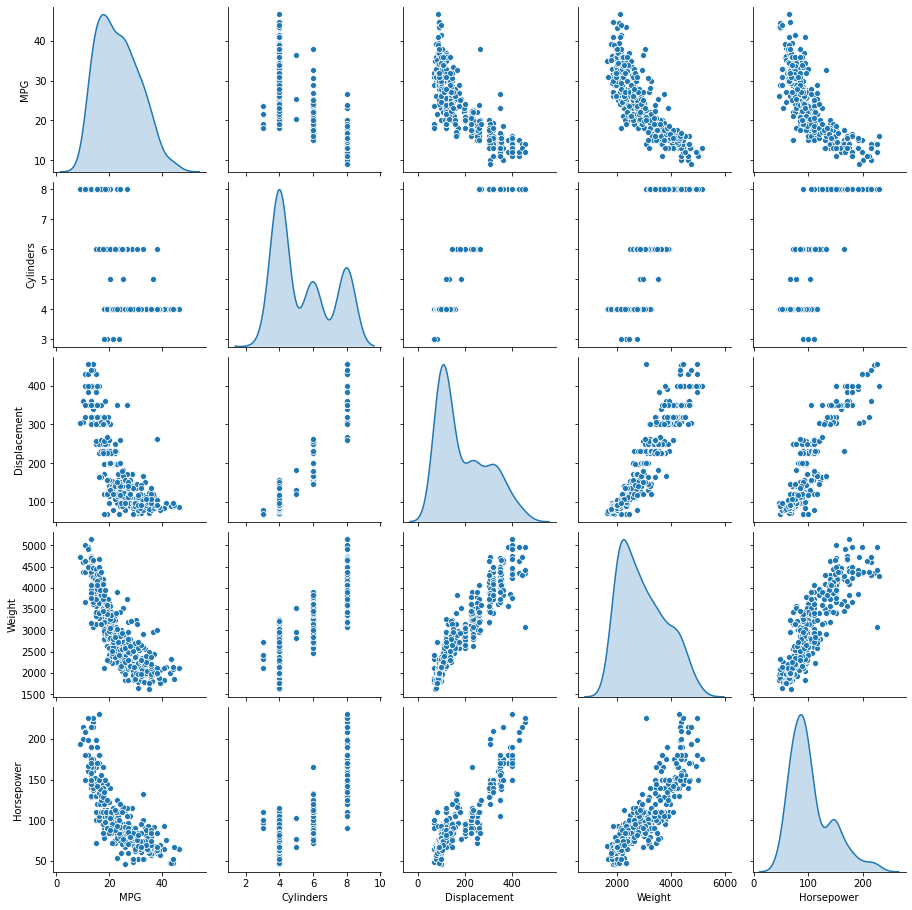

In [10]:
sns.pairplot(data[["MPG", "Cylinders", "Displacement", "Weight", "Horsepower"]], diag_kind="kde")

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [12]:
strat_train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [13]:
strat_test_set["Cylinders"].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [14]:
data_df = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()
data_df

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,4,83.0,61.0,2003.0,19.0,74,3
151,4,79.0,67.0,2000.0,16.0,74,2
388,4,156.0,92.0,2585.0,14.5,82,1
48,6,250.0,88.0,3139.0,14.5,71,1
114,4,98.0,90.0,2265.0,15.5,73,2
...,...,...,...,...,...,...,...
147,4,90.0,75.0,2108.0,15.5,74,2
156,8,400.0,170.0,4668.0,11.5,75,1
395,4,135.0,84.0,2295.0,11.6,82,1
14,4,113.0,95.0,2372.0,15.0,70,3


In [15]:
data_df['Origin'] = data_df['Origin'].map({1: 'India', 2: 'USA', 3 : 'Germany'})
data_df.sample(10)

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
312,4,86.0,65.0,2019.0,16.4,80,Germany
242,4,121.0,110.0,2600.0,12.8,77,USA
154,6,250.0,72.0,3432.0,21.0,75,India
307,6,173.0,115.0,2700.0,12.9,79,India
388,4,156.0,92.0,2585.0,14.5,82,India
360,6,145.0,76.0,3160.0,19.6,81,USA
227,6,225.0,100.0,3630.0,17.7,77,India
230,8,350.0,170.0,4165.0,11.4,77,India
61,4,122.0,86.0,2226.0,16.5,72,India
226,6,231.0,105.0,3425.0,16.9,77,India


In [16]:
data_cat = data_df[["Origin"]]
data_cat

,Origin
145,Germany
151,USA
388,India
48,India
114,USA
...,...
147,USA
156,India
395,India
14,Germany


In [17]:
train_set = pd.get_dummies(strat_train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,3
151,31.0,4,79.0,67.0,2000.0,16.0,74,2
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
48,18.0,6,250.0,88.0,3139.0,14.5,71,1
114,26.0,4,98.0,90.0,2265.0,15.5,73,2


In [18]:
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cyl'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acceleration_on_cyl      0.732133
acceleration_on_power    0.704240
Model Year               0.579267
Origin                   0.563450
Acceleration             0.420289
weight_on_cylinder      -0.020778
displacement_on_power   -0.577236
Horsepower              -0.773453
Cylinders               -0.775396
Displacement            -0.804203
Weight                  -0.831741
Name: MPG, dtype: float64

In [19]:
cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot   # returns a sparse matrix

data_cat_1hot.toarray()[:5]

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
cat_encoder.categories_

[array(['Germany', 'India', 'USA'], dtype=object)]

In [21]:
num_data = data.iloc[:, :-1]
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MPG                    398 non-null    float64
 1   Cylinders              398 non-null    int64  
 2   Displacement           398 non-null    float64
 3   Horsepower             398 non-null    float64
 4   Weight                 398 non-null    float64
 5   Acceleration           398 non-null    float64
 6   Model Year             398 non-null    int64  
 7   Origin                 398 non-null    int64  
 8   displacement_on_power  398 non-null    float64
 9   weight_on_cylinder     398 non-null    float64
 10  acceleration_on_power  398 non-null    float64
dtypes: float64(8), int64(3)
memory usage: 34.3 KB


In [22]:
imputer = SimpleImputer(strategy="median")
imputer.fit(num_data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [23]:
imputer.statistics_

array([2.30000000e+01, 4.00000000e+00, 1.48500000e+02, 9.35000000e+01,
       2.80350000e+03, 1.55000000e+01, 7.60000000e+01, 1.00000000e+00,
       1.67609819e+00, 5.41437500e+02, 1.70795455e-01])

In [24]:
data.median().values

array([2.30000000e+01, 4.00000000e+00, 1.48500000e+02, 9.35000000e+01,
       2.80350000e+03, 1.55000000e+01, 7.60000000e+01, 1.00000000e+00,
       1.67609819e+00, 5.41437500e+02, 1.70795455e-01, 3.50000000e+00])

In [25]:
X = imputer.transform(num_data)
X

array([[1.80000000e+01, 8.00000000e+00, 3.07000000e+02, ...,
        2.36153846e+00, 4.38000000e+02, 9.23076923e-02],
       [1.50000000e+01, 8.00000000e+00, 3.50000000e+02, ...,
        2.12121212e+00, 4.61625000e+02, 6.96969697e-02],
       [1.80000000e+01, 8.00000000e+00, 3.18000000e+02, ...,
        2.12000000e+00, 4.29500000e+02, 7.33333333e-02],
       ...,
       [3.20000000e+01, 4.00000000e+00, 1.35000000e+02, ...,
        1.60714286e+00, 5.73750000e+02, 1.38095238e-01],
       [2.80000000e+01, 4.00000000e+00, 1.20000000e+02, ...,
        1.51898734e+00, 6.56250000e+02, 2.35443038e-01],
       [3.10000000e+01, 4.00000000e+00, 1.19000000e+02, ...,
        1.45121951e+00, 6.80000000e+02, 2.36585366e-01]])

In [26]:
data_tr = pd.DataFrame(X, columns=num_data.columns, index=num_data.index)
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MPG                    398 non-null    float64
 1   Cylinders              398 non-null    float64
 2   Displacement           398 non-null    float64
 3   Horsepower             398 non-null    float64
 4   Weight                 398 non-null    float64
 5   Acceleration           398 non-null    float64
 6   Model Year             398 non-null    float64
 7   Origin                 398 non-null    float64
 8   displacement_on_power  398 non-null    float64
 9   weight_on_cylinder     398 non-null    float64
 10  acceleration_on_power  398 non-null    float64
dtypes: float64(11)
memory usage: 34.3 KB


In [27]:
num_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,displacement_on_power,weight_on_cylinder,acceleration_on_power
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,2.361538,438.000,0.092308
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,2.121212,461.625,0.069697
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,2.120000,429.500,0.073333
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,2.026667,429.125,0.080000
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,2.157143,431.125,0.075000


In [28]:
acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power  # new optional variable
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix] # required new variable
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl] # returns a 2D array
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([1.80000000e+01, 8.00000000e+00, 3.07000000e+02, 1.30000000e+02,
       3.50400000e+03, 1.20000000e+01, 7.00000000e+01, 1.00000000e+00,
       2.36153846e+00, 4.38000000e+02, 9.23076923e-02, 1.14136808e+01,
       1.94666667e+02])

In [29]:
def num_pipeline_transformer(data):
    numerics = ['float64', 'int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

In [30]:
def pipeline_transformer(data):
    cat_attrs = ["Origin"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [31]:
def preprocess_origin_cols(df):
    df["Origin"] = df["Origin"].map({1: "India", 2: "USA", 3: "Germany"})    
    return df

In [32]:
data = df.copy()
data = strat_train_set.drop("MPG", axis=1)
data_labels = strat_train_set["MPG"].copy()

preprocessed_df = preprocess_origin_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.85657842, -1.07804475, -1.15261228, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85657842, -1.1174582 , -0.99069325, ...,  0.        ,
         0.        ,  1.        ],
       [-0.85657842, -0.3587492 , -0.31603064, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.85657842, -0.56566984, -0.53192268, ...,  0.        ,
         1.        ,  0.        ],
       [-0.85657842, -0.78244384, -0.23507113, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.32260746, -0.45728283,  0.43959149, ...,  1.        ,
         0.        ,  0.        ]])

In [33]:
prepared_data[0]

array([-0.85657842, -1.07804475, -1.15261228, -1.17220298,  1.21586943,
       -0.54436373,  1.71003081,  1.29565517,  1.        ,  0.        ,
        0.        ])

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(prepared_data, data_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
sample_data = data.iloc[:5]
sample_labels = data_labels.iloc[:5]
sample_data_prepared = pipeline_transformer(sample_data)

print("Prediction of samples: ", lin_reg.predict(sample_data_prepared))

Prediction of samples:  [29.07706113 27.78221362 26.08507595 12.68921922 22.24811759]


In [36]:
print("Actual Labels of samples: ", list(sample_labels))

Actual Labels of samples:  [32.0, 31.0, 26.0, 18.0, 26.0]


In [37]:
mpg_predictions = lin_reg.predict(prepared_data)
lin_mse = mean_squared_error(data_labels, mpg_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9599557382767734

In [38]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(prepared_data, data_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
mpg_predictions = tree_reg.predict(prepared_data)
tree_mse = mean_squared_error(data_labels, mpg_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [40]:
scores = cross_val_score(tree_reg, 
                         prepared_data, 
                         data_labels, 
                         scoring="neg_mean_squared_error", 
                         cv = 10)
tree_reg_rmse_scores = np.sqrt(-scores)

In [41]:
tree_reg_rmse_scores

array([2.9389624 , 3.02220946, 2.85739173, 3.34121984, 2.40305795,
       3.06334172, 3.85296152, 4.50124983, 4.10098336, 2.44810658])

In [42]:
tree_reg_rmse_scores.mean()

3.252948437990716

In [43]:
scores = cross_val_score(lin_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv = 10)
lin_reg_rmse_scores = np.sqrt(-scores)
lin_reg_rmse_scores

array([3.43029715, 3.45041922, 3.66364877, 2.59538773, 2.48739898,
       2.746598  , 3.32560073, 2.42211361, 3.78139392, 2.86493978])

In [44]:
lin_reg_rmse_scores.mean()

3.076779788960899

In [45]:
forest_reg = RandomForestRegressor()
forest_reg.fit(prepared_data, data_labels)
forest_reg_cv_scores = cross_val_score(forest_reg,
                                         prepared_data,
                                         data_labels,
                                         scoring='neg_mean_squared_error',
                                         cv = 10)

forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

2.5731773192614273

In [46]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(prepared_data, data_labels)
svm_cv_scores = cross_val_score(svm_reg, prepared_data, data_labels,
                                scoring='neg_mean_squared_error',
                                cv = 10)
svm_rmse_scores = np.sqrt(-svm_cv_scores)
svm_rmse_scores.mean()

3.088411910825019

In [47]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [48]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [49]:
cv_scores = grid_search.cv_results_

##printing all the parameters along with their scores
for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

3.5749674002824747 {'max_features': 2, 'n_estimators': 3}
2.912095806440285 {'max_features': 2, 'n_estimators': 10}
2.893886505940237 {'max_features': 2, 'n_estimators': 30}
3.1838144586593704 {'max_features': 4, 'n_estimators': 3}
2.795174658401106 {'max_features': 4, 'n_estimators': 10}
2.778420590519474 {'max_features': 4, 'n_estimators': 30}
3.1068214814729758 {'max_features': 6, 'n_estimators': 3}
2.7890714017884504 {'max_features': 6, 'n_estimators': 10}
2.7008621974367766 {'max_features': 6, 'n_estimators': 30}
3.2683398652695828 {'max_features': 8, 'n_estimators': 3}
2.7025941185753486 {'max_features': 8, 'n_estimators': 10}
2.734003215431403 {'max_features': 8, 'n_estimators': 30}
3.328368984738067 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
2.8366572483749364 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
3.181913492963394 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.9283872360798675 {'bootstrap': False, 'max_features': 3, 'n_estima

In [50]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13761906, 0.26782471, 0.10235644, 0.23828385, 0.01536688,
       0.1139684 , 0.02927311, 0.08904439, 0.00246887, 0.00144035,
       0.00235392])

In [51]:
extra_attrs = ["acc_on_power", "acc_on_cyl"]
numerics = ['float64', 'int64']
num_attrs = list(data.select_dtypes(include=numerics))

attrs = num_attrs + extra_attrs
sorted(zip(attrs, feature_importances), reverse=True)

[('acc_on_power', 0.029273113250636407),
 ('acc_on_cyl', 0.08904438621375999),
 ('Weight', 0.2382838509583553),
 ('Model Year', 0.11396839712174722),
 ('Horsepower', 0.10235644293958585),
 ('Displacement', 0.26782471441674793),
 ('Cylinders', 0.13761905960081788),
 ('Acceleration', 0.015366884090132019)]

In [52]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("MPG", axis=1)
y_test = strat_test_set["MPG"].copy()

X_test_preprocessed = preprocess_origin_cols(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [53]:
final_rmse

2.8795921296831843

In [54]:
def predict_mpg(config, model):
    
    if type(config) == dict:
        df = pd.DataFrame(config)
    else:
        df = config
    
    preproc_df = preprocess_origin_cols(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    return y_pred

In [55]:
vehicle_config = {
    'Cylinders': [4, 6, 8],
    'Displacement': [155.0, 160.0, 165.5],
    'Horsepower': [93.0, 130.0, 98.0],
    'Weight': [2500.0, 3150.0, 2600.0],
    'Acceleration': [15.0, 14.0, 16.0],
    'Model Year': [81, 80, 78],
    'Origin': [3, 2, 1]
}

predict_mpg(vehicle_config, final_model)

array([33.33333333, 17.92      , 21.31      ])

In [56]:
import pickle

In [57]:
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [58]:
with open('model.bin', 'rb') as f_in:
    model = pickle.load(f_in)

predict_mpg(vehicle_config, model)

array([33.33333333, 17.92      , 21.31      ])